# **Prepare Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/drive/MyDrive/lichess.csv", delimiter = ",", encoding = "utf-8")

Descriptive statistics

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3386423 entries, 0 to 3386422
Data columns (total 19 columns):
 #   Column           Dtype  
---  ------           -----  
 0   event            object 
 1   white            object 
 2   black            object 
 3   result           object 
 4   UTCDate          object 
 5   day              int64  
 6   month            int64  
 7   year             int64  
 8   UTCTime          object 
 9   whiteELO         float64
 10  blackELO         float64
 11  RatingDiff       float64
 12  whiteRatingDiff  float64
 13  blackRatingDiff  float64
 14  ECO              object 
 15  opening          object 
 16  timeControl      object 
 17  termination      object 
 18  totalMove        int64  
dtypes: float64(5), int64(4), object(10)
memory usage: 490.9+ MB


In [4]:
df.nunique()

event                  7
white              60997
black              62355
result                 3
UTCDate              366
day                   31
month                 12
year                   2
UTCTime            86400
whiteELO            1749
blackELO            1768
RatingDiff          1141
whiteRatingDiff     1140
blackRatingDiff     1153
ECO                  489
opening             2771
timeControl          978
termination            3
totalMove            168
dtype: int64

In [5]:
df.head()

,event,white,black,result,UTCDate,day,month,year,UTCTime,whiteELO,blackELO,RatingDiff,whiteRatingDiff,blackRatingDiff,ECO,opening,timeControl,termination,totalMove
0,Rated Correspondence game,felixrbran,wiles,0-1,2013.07.02,2,7,2013,21:16:17,1398.0,1767.0,369.0,-3.0,3.0,A00,Polish Opening,NaN,Normal,25
1,Rated Correspondence game,singhk,bhangooj,0-1,2013.07.12,12,7,2013,04:25:22,1538.0,1461.0,77.0,-113.0,113.0,A00,Grob Opening,NaN,Normal,10
2,Rated Correspondence game,Mrkvak,?,1-0,2013.04.04,4,4,2013,19:44:52,NaN,NaN,NaN,NaN,NaN,A01,Nimzo-Larsen Attack: Modern Variation #4,NaN,Normal,38
3,Rated Correspondence game,Unknown Player,CaLiBRe,1-0,2013.04.09,9,4,2013,19:09:36,NaN,NaN,NaN,NaN,NaN,B01,Scandinavian Defense,NaN,Normal,20
4,Rated Correspondence game,dbalka,Polinusik,1-0,2013.04.11,11,4,2013,19:43:45,1682.0,1122.0,560.0,2.0,-5.0,B02,Alekhine Defense: Mokele Mbembe,NaN,Normal,23


In [6]:
round(df.describe(), 3)

,day,month,year,whiteELO,blackELO,RatingDiff,whiteRatingDiff,blackRatingDiff,totalMove
count,3386423.000,3386423.000,3386423.000,3380733.000,3380733.000,3380733.000,3380733.000,3380733.000,3386423.000
mean,16.167,8.182,2013.000,1613.270,1603.674,153.787,0.190,-1.751,33.761
std,8.836,3.224,0.006,213.715,219.879,132.403,34.322,39.031,16.016
min,1.000,1.000,2012.000,758.000,735.000,0.000,-620.000,-618.000,0.000
25%,9.000,6.000,2013.000,1473.000,1462.000,54.000,-10.000,-11.000,23.000
50%,16.000,9.000,2013.000,1611.000,1599.000,119.000,2.000,-3.000,32.000
75%,24.000,11.000,2013.000,1753.000,1747.000,216.000,10.000,10.000,43.000
max,31.000,12.000,2013.000,2581.000,2600.000,1376.000,638.000,649.000,191.000


(array([3.305000e+03, 3.371700e+04, 2.019540e+05, 6.790650e+05,
        1.139883e+06, 8.856240e+05, 3.402940e+05, 8.611800e+04,
        1.051800e+04, 2.550000e+02]),
 array([ 758. ,  940.3, 1122.6, 1304.9, 1487.2, 1669.5, 1851.8, 2034.1,
        2216.4, 2398.7, 2581. ]),
 <a list of 10 Patch objects>)

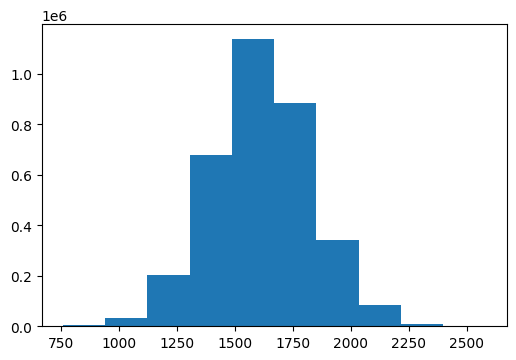

In [7]:
plt.figure(dpi = 100)
plt.hist(df["whiteELO"])

(array([3.51600e+03, 3.77500e+04, 2.18497e+05, 6.74524e+05, 1.17493e+06,
        8.45662e+05, 3.30081e+05, 8.55040e+04, 1.00240e+04, 2.45000e+02]),
 array([ 735. ,  921.5, 1108. , 1294.5, 1481. , 1667.5, 1854. , 2040.5,
        2227. , 2413.5, 2600. ]),
 <a list of 10 Patch objects>)

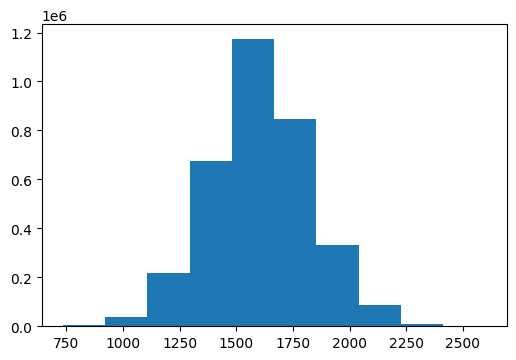

In [8]:
plt.figure(dpi = 100)
plt.hist(df["blackELO"])

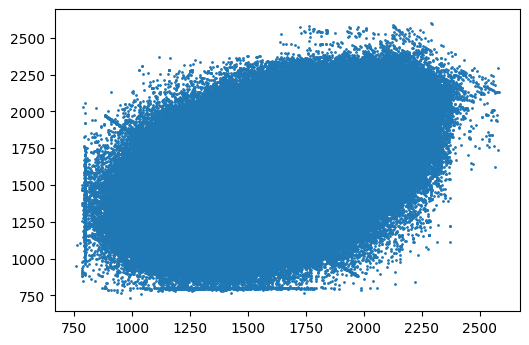

In [9]:
plt.figure(dpi = 100)
plt.scatter(df["whiteELO"], df["blackELO"], s = 1)

(array([1.888853e+06, 9.534930e+05, 3.618240e+05, 1.247050e+05,
        3.821800e+04, 1.073100e+04, 2.290000e+03, 5.410000e+02,
        6.800000e+01, 1.000000e+01]),
 array([   0. ,  137.6,  275.2,  412.8,  550.4,  688. ,  825.6,  963.2,
        1100.8, 1238.4, 1376. ]),
 <a list of 10 Patch objects>)

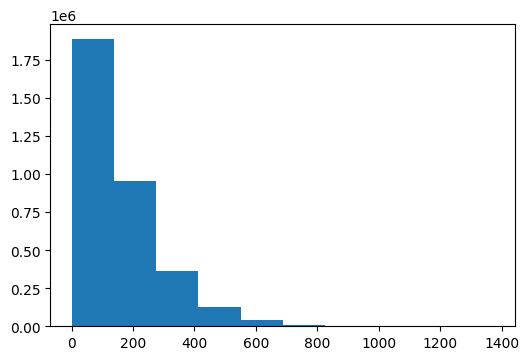

In [10]:
plt.figure(dpi = 100)
plt.hist(df["RatingDiff"])

(array([5.999770e+05, 1.651938e+06, 8.541940e+05, 2.383920e+05,
        3.582300e+04, 5.001000e+03, 9.240000e+02, 1.510000e+02,
        1.900000e+01, 4.000000e+00]),
 array([  0. ,  19.1,  38.2,  57.3,  76.4,  95.5, 114.6, 133.7, 152.8,
        171.9, 191. ]),
 <a list of 10 Patch objects>)

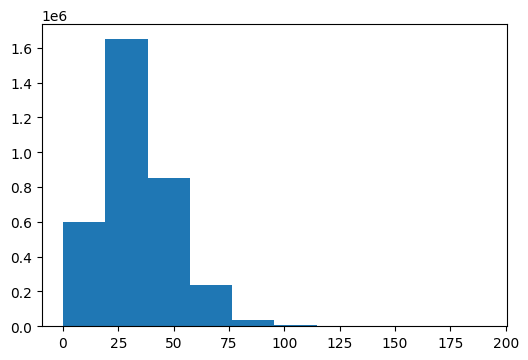

In [11]:
plt.figure(dpi = 100)
plt.hist(df["totalMove"])

Handle Missing Value and Split Data

In [12]:
from sklearn.preprocessing import LabelEncoder

x = df.iloc[:,np.r_[9:15,16:19]]
y = df.iloc[:,3]

# Handle missing value
x["whiteELO"].fillna(round(x["whiteELO"].mean(), 0), inplace = True)
x["blackELO"].fillna(round(x["blackELO"].mean(), 0), inplace = True)
x["RatingDiff"].fillna(round(x["RatingDiff"].median(), 0), inplace = True)
x["whiteRatingDiff"].fillna(round(x["whiteRatingDiff"].mean(), 0), inplace = True)
x["blackRatingDiff"].fillna(round(x["blackRatingDiff"].mean(), 0), inplace = True)
x["timeControl"].fillna(x["timeControl"].mode().iloc[0], inplace = True)

# Convert data to float
le = LabelEncoder()
x["ECO"] = le.fit_transform(x["ECO"])
x["timeControl"] = le.fit_transform(x["timeControl"])
x["termination"] = le.fit_transform(x["termination"])
y = le.fit_transform(y)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [40]:
x

,whiteELO,blackELO,RatingDiff,whiteRatingDiff,blackRatingDiff,ECO,timeControl,termination,totalMove
0,1398.0,1767.0,369.0,-3.0,3.0,1,708,0,25
1,1538.0,1461.0,77.0,-113.0,113.0,1,708,0,10
2,1613.0,1604.0,119.0,0.0,-2.0,2,708,0,38
3,1613.0,1604.0,119.0,0.0,-2.0,101,708,0,20
4,1682.0,1122.0,560.0,2.0,-5.0,102,708,0,23
...,...,...,...,...,...,...,...,...,...
3386418,1692.0,1382.0,310.0,3.0,-4.0,41,13,2,19
3386419,1613.0,1618.0,5.0,12.0,-12.0,306,708,2,27
3386420,1286.0,1293.0,7.0,12.0,-53.0,255,130,2,31
3386421,1646.0,1306.0,340.0,3.0,-13.0,244,708,2,22


In [41]:
y

array([0, 0, 1, ..., 1, 1, 0])

Descriptive statistics after handle missing value

(array([3.305000e+03, 3.371700e+04, 2.019540e+05, 6.790650e+05,
        1.145573e+06, 8.856240e+05, 3.402940e+05, 8.611800e+04,
        1.051800e+04, 2.550000e+02]),
 array([ 758. ,  940.3, 1122.6, 1304.9, 1487.2, 1669.5, 1851.8, 2034.1,
        2216.4, 2398.7, 2581. ]),
 <a list of 10 Patch objects>)

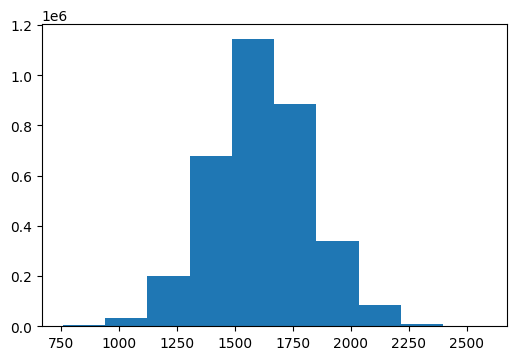

In [13]:
plt.figure(dpi = 100)
plt.hist(x["whiteELO"])

(array([3.51600e+03, 3.77500e+04, 2.18497e+05, 6.74524e+05, 1.18062e+06,
        8.45662e+05, 3.30081e+05, 8.55040e+04, 1.00240e+04, 2.45000e+02]),
 array([ 735. ,  921.5, 1108. , 1294.5, 1481. , 1667.5, 1854. , 2040.5,
        2227. , 2413.5, 2600. ]),
 <a list of 10 Patch objects>)

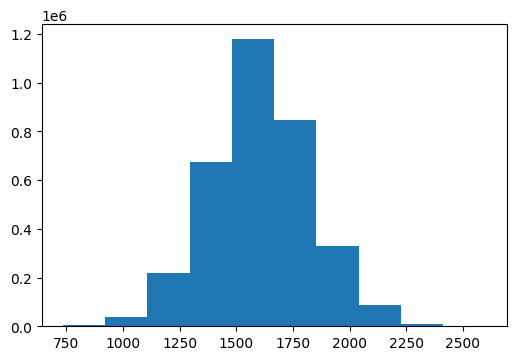

In [14]:
plt.figure(dpi = 100)
plt.hist(x["blackELO"])

Correlation of ELO Rating of both side:  0.5632098504776208 



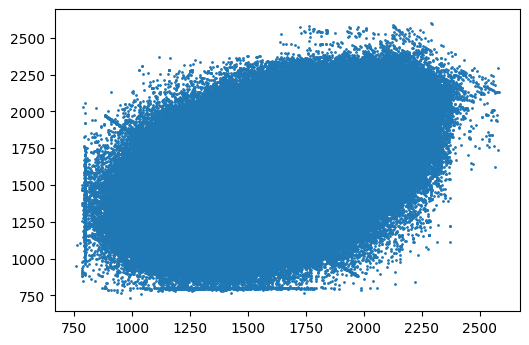

In [15]:
from scipy.stats import pearsonr

corr = pearsonr(x["whiteELO"], x["blackELO"])
print("Correlation of ELO Rating of both side: ", corr[0], "\n")

plt.figure(dpi = 100)
plt.scatter(x["whiteELO"], x["blackELO"], s = 1)

(array([1.894543e+06, 9.534930e+05, 3.618240e+05, 1.247050e+05,
        3.821800e+04, 1.073100e+04, 2.290000e+03, 5.410000e+02,
        6.800000e+01, 1.000000e+01]),
 array([   0. ,  137.6,  275.2,  412.8,  550.4,  688. ,  825.6,  963.2,
        1100.8, 1238.4, 1376. ]),
 <a list of 10 Patch objects>)

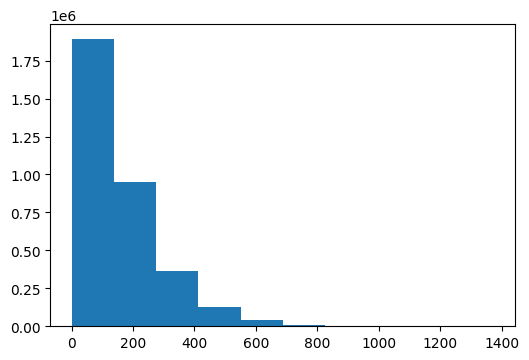

In [16]:
plt.figure(dpi = 100)
plt.hist(x["RatingDiff"])

(array([5.999770e+05, 1.651938e+06, 8.541940e+05, 2.383920e+05,
        3.582300e+04, 5.001000e+03, 9.240000e+02, 1.510000e+02,
        1.900000e+01, 4.000000e+00]),
 array([  0. ,  19.1,  38.2,  57.3,  76.4,  95.5, 114.6, 133.7, 152.8,
        171.9, 191. ]),
 <a list of 10 Patch objects>)

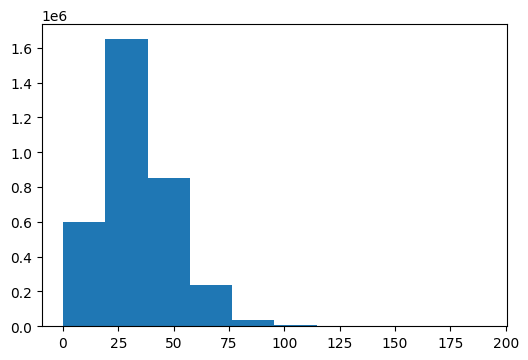

In [17]:
plt.figure(dpi = 100)
plt.hist(x["totalMove"])

# **Data Modelling**

Modelling

In [20]:
# pip install catBoost

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import metrics

class_names = ["0-1","1-0","1/2-1/2"]
scorer = metrics.make_scorer(metrics.f1_score, average = "weighted")
k = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 1, random_state = 7848654)

In [ ]:
LR = LogisticRegression(random_state = 1234, solver = "lbfgs", multi_class = "multinomial", max_iter = 100)
LR_score = cross_val_score(LR, x, y, cv = k, scoring = scorer)

In [25]:
DT = DecisionTreeClassifier()
DT_score = cross_val_score(DT, x, y, cv = k, scoring = scorer)

In [26]:
NN = MLPClassifier(solver = "lbfgs", alpha = 1e-5, hidden_layer_sizes = (100, 30), random_state = 1234)
NN_score = cross_val_score(DT, x, y, cv = k, scoring = scorer)

In [ ]:
catBoost = CatBoostClassifier(
    iterations = 50,
    learning_rate = 0.1,
    random_strength = 0.1,
    depth = 8,
    loss_function = "MultiClass",
    eval_metric = "Accuracy",
    leaf_estimation_method = "Newton"
)
CB_score = cross_val_score(catBoost, x, y, cv = k, scoring = scorer)

Comparison of models score

In [39]:
print("Comparison of model efficiency base on F1 score\n")
print("LR :", np.around(LR_score, 4))
print("DT :", np.around(DT_score, 4))
print("NN :", np.around(NN_score, 4))
print("CB :", np.around(CB_score, 4))
print("\n")
print("Logistic Regression score  :", round(np.mean(LR_score), 5) , " (", round(np.mean(LR_score) * 100, 5), "% ) standard deviation: ", round(np.std(LR_score) * 100, 2), "% )")
print("Decision Tree score        :", round(np.mean(DT_score), 5) , " (", round(np.mean(DT_score) * 100, 5), "% ) standard deviation: ", round(np.std(DT_score) * 100, 2), "% )")
print("Neural Network score       :", round(np.mean(NN_score), 5) , " (", round(np.mean(NN_score) * 100, 5), "% ) standard deviation: ", round(np.std(NN_score) * 100, 2), "% )")
print("CatBoost score             :", round(np.mean(CB_score), 5) , " (", round(np.mean(CB_score) * 100, 5), "% ) standard deviation: ", round(np.std(CB_score) * 100, 2), "% )")

Comparison of model efficiency base on F1 score

LR : [0.9928 0.9928 0.9934 0.9929 0.9934 0.9929 0.9932 0.9929 0.9933 0.9929]
DT : [0.998  0.9981 0.9981 0.998  0.9981 0.998  0.9982 0.9979 0.998  0.9981]
NN : [0.9981 0.9981 0.9981 0.998  0.9981 0.998  0.9982 0.9979 0.998  0.9981]
CB : [0.9958 0.9957 0.9959 0.9957 0.9959 0.9957 0.9959 0.9958 0.9955 0.9958]


Logistic Regression score  : 0.99305  ( 99.30467 % ) standard deviation:  0.02 %
Decision Tree score        : 0.99804  ( 99.804 % ) standard deviation:  0.01 %
Neural Network score       : 0.99807  ( 99.80661 % ) standard deviation:  0.01 %
CatBoost score             : 0.99576  ( 99.57578 % ) standard deviation:  0.01 %
